**These imports should run successfully (with a warning you can ignore). If they don't, it means you need to install them with the command listed on the lab handout! Close out of Jupyter first.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


# Binary Classifier Perceptron Model

In this notebook, we'll write the essential functions to build and train a Perceptron that can classify images in the MNIST dataset. If you've never used Jupyter, these boxes are individual code snippets that can be run individually. Variables are stored in their scope across the entire document. Boxes like these are markdown, for documentation and instructional purposes!

### I. Perceptron Functions

To start, we'll write the functions that define a Binary Classifying Perceptron. Looking at Figure 1 in the handout, we can see that the overall behavior is split into two operations: the dot product in the neuron, and the activation function. Start by implementing a function that recreates the neuron. This function should compute the dot product between our input and weight vectors, then add the bias:

In [2]:
def neuron(x, weights, bias):
    """
    Computes the dot product between given data vector (x) and adds bias.
    """
    z = np.dot(weights, x) + bias
    return z

Next, implement the activation function that will map the dot product to either a '1' or a '0' (as seen in Figure 2):

In [3]:
def activation_function(prediction):
    """
    Receives the output of the perceptron's function as parameter, and applies the
    activation function on it.
    In this simple model, the activation function is a unit step which classifies
    negative inputs as 0 and positive inputs as 1.
    """
    if prediction >= 0:
        return 1
    return 0

These two functions together define the entirety of the Perceptron's behavior. Putting them together in a 'predict' function gives us the ability (with the correct weights) to classify vectors of pixels as either '1's or '0's!

In [4]:
def predict(x, weights, bias):
    """
    Predicts the class of a given data point (x) by running the input through 
    the neuron (dot product) and then applying the activation function.
    """
    prediction = np.dot(weights, x) + bias
    prediction = activation_function(prediction)
    
    return (prediction)

### II. Training Functions

Next, we will implement some functions that will train the weights of our model to make correct predictions. The key function here is 'foward_propagation', which acts on a single input vector and returns the loss. We're using mean-squared error loss (for a single input, just the squared difference between the prediction and the label) and its derivative.

In [6]:
def forward_propagation(x, y, weights, bias): 
    """
    x: training data as a vector (nparray), where each value corresponds
        to a feature's value
    y: label (0 or 1)
    weights: weights of the perceptron
    bias: bias
    """
    y_pred = predict(x, weights, bias)
    loss = (y_pred - y)**2   
    d_loss = 2*(y_pred - y)
    
    return y_pred, loss, d_loss

In training, each of the weights is adjusted by the partial derivative of the loss with respect to that weight. In 'back_propagation', we must now take the partial derivative (with respect to each weight) of the dot product performed in the neuron. The adding terms in the dot product all fall away, so we are left with the derivative of the specific weight multiplied by its corresponding pixel. The result is just the pixel value, which we multiply by d_loss calculated above to get a full list of partial derivatives.

In [7]:
def back_propagation(x, d_loss):
    """
    Performs the Backpropagation step on a given data point.
    Receives as input the data point, the Perceptron's weights and the partial derivative of the loss
    over the predicted y.
    The received derivative is used to calculate the partial derivative of the loss over the weight of each feature.
    A list with the partial derivatives of the loss over each weight is returned.
    """
    partial_derivates = list()
    for feature_value in x:
        partial_derivates.append(d_loss*feature_value)
        
    return partial_derivates  

A final training function brings it all together. Now, 'x' is a 2D array of pixel vectors containing our entire dataset (and 'y' is the labels). To optimize the perceptron, we run through the dataset numerous times and adjust the weights by those partial derivatives until the error is sufficiently minimized.

In [8]:
def optimize_perceptron(x, y, learning_rate,  maxEpochs):
    """
    Optimizes the Perceptron's weights by looping over the same steps for the specified number of epochs.
    Steps:
    1. Forward propagate data point
    2. Backpropagate
    3. Update weights
    4. Check stop conditions while looping
    """
    epoch = 0
    error = 999
    weights = np.random.rand(x.shape[1])
    bias = np.random.rand()
    
    errors = list()
    epochs = list()
    
    # Loop until stop conditions are met
    while (epoch <= maxEpochs) and (error > 9e-4):
        
        loss_ = 0
        # Loop over every data point
        for i in range(x.shape[0]):
            
            # Forward Propagation on each data point
            y_pred, loss, d_loss = forward_propagation(x[i], y[i], weights, bias)

            # Backpropagation
            partial_derivates = back_propagation(x[i], d_loss)
            
            # Learn by updating the weights of the perceptron
            weights = weights - (learning_rate * np.array(partial_derivates))

        # Evaluate the results
        for index, feature_value_test in enumerate(x):
            y_pred, loss, d_loss = forward_propagation(feature_value_test, y[index], weights, bias)
            loss_ += loss

        errors.append(loss_/len(x))
        epochs.append(epoch)
        error = errors[-1]
        epoch += 1

        print('Epoch {}. loss: {}'.format(epoch, errors[-1]))

    
    return weights, bias, errors

### III. Data

We're finally ready to get our data! We'll be using just the 0s and 1s from the MNIST dataset, a selection of handwritten digits used frequently as a benchmark for neural networks. This section is pre-written for you, but take a second to see how the data is formatted and split in training and test sets. 

Data Matrix: (8816, 785)
Data Labels: [0 1]
Training Set Matrix: (6612, 784)
Test Set Matrix: (2204, 784)
Training Label Matrix: (6612,)
Test Set Matrix: (2204,)


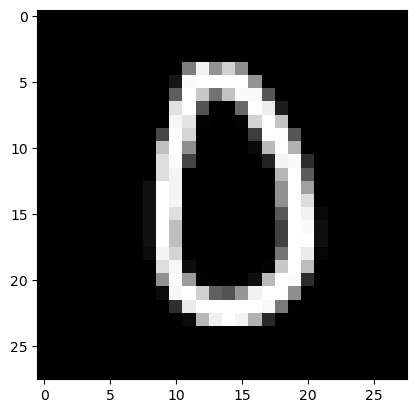

In [9]:
data = pd.read_csv('data_mnist.zip')

# Take only data with labels 1
data_ones = data[data['label'] == 1]

# Take only data with labels 0
data_zeros = data[data['label'] == 0]

# If you want to change either digit, just change the label value to either a 0 or a 1 so the activation function is still valid
# Ex. data_sevens = data[data['label'] == 7]
#     data_sevens['label'] = 0

# Concatenate instances with label 0 and 1
data = pd.concat([data_ones, data_zeros])
print("Data Matrix: {}".format(data.shape))
print("Data Labels: {}".format(np.unique(data['label'].to_numpy())))

# Split dataset with 75% training data and 25% test data
train_data, test_data = train_test_split(data, test_size=0.25, random_state=1, shuffle=True)

# Split datasets into features and labels
x_train = train_data.drop('label', axis=1).to_numpy()
x_test = test_data.drop('label', axis=1).to_numpy()
y_train = train_data['label'].to_numpy()
y_test = test_data['label'].to_numpy()

# Let's see our data! The second dimension is the number of pixels, 28x28 = 784
print("Training Set Matrix: {}".format(x_train.shape))
print("Test Set Matrix: {}".format(x_test.shape))
print("Training Label Matrix: {}".format(y_train.shape))
print("Test Set Matrix: {}".format(y_test.shape))

# Rescale data points to values between 0 and 1 (pixels are originally 0-255)
x_train = x_train / 255.
x_test = x_test / 255.

# An example image from the training set:
plt.imshow(x_train[1].reshape([28, 28]), cmap='Greys_r')

### IV. Training the Model

We have our data, and we have our training functions. Let's run optimize_perceptron with these parameters and see how the model behaves. You should see the loss decreasing after each epoch.

In [10]:
weights, bias, errors = optimize_perceptron(x_train, y_train, learning_rate = 0.001, maxEpochs = 20)

Epoch 1. loss: 0.014216575922565033
Epoch 2. loss: 0.009528130671506351
Epoch 3. loss: 0.0069570477918935265
Epoch 4. loss: 0.004990925589836661
Epoch 5. loss: 0.004234724742891712
Epoch 6. loss: 0.004234724742891712
Epoch 7. loss: 0.004083484573502722
Epoch 8. loss: 0.003327283726557774
Epoch 9. loss: 0.0028735632183908046
Epoch 10. loss: 0.002571082879612825
Epoch 11. loss: 0.0024198427102238356
Epoch 12. loss: 0.0024198427102238356
Epoch 13. loss: 0.002268602540834846
Epoch 14. loss: 0.002268602540834846
Epoch 15. loss: 0.0018148820326678765
Epoch 16. loss: 0.001663641863278887
Epoch 17. loss: 0.0015124016938898972
Epoch 18. loss: 0.0012099213551119178
Epoch 19. loss: 0.0013611615245009074
Epoch 20. loss: 0.0013611615245009074
Epoch 21. loss: 0.001058681185722928


### V. Evaluating the Model

We'll use this function to determine the accuracy of our model. It just loops through the entire test set and finds the ratio of correct predictions to total data.

In [11]:
def calculate_accuracy(x_test, y_test, weights, bias):
    
    correct = 0
    
    for sample, label in zip(x_test, y_test):
        prediction = predict(sample, weights, bias)

        if prediction == label:
            correct += 1

    accuracy = correct / len(x_test)
    return accuracy


acc = calculate_accuracy(x_test, y_test, weights, bias)
print('Accuracy: ', acc)

Accuracy:  0.9981851179673321


### VI. Extracting Weights and Images

Visualizing the weights of the Perceptron show how it has learned - you may see an abstract shape of a 0 or 1!

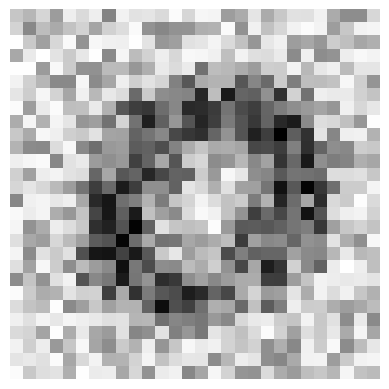

In [33]:
plt.imshow(weights.reshape([28,28]), cmap='Greys_r')
plt.axis('off')
plt.show()

The final goal of this notebook is to port the weights into our VHDL module as ROM. To do this, we'll need to convert all the weights into signed 8-bit values. Then, we'll create a .vhd file with a case statement containing all these weights.

In [74]:
def twos_comp(num, bits):
  """Converts an integer to its two's complement binary representation as a string.
    num: The integer to convert.
    bits: The number of bits to use for the representation.
  """
  if num < 0:
    num = (1 << bits) + num  # Adjust negative numbers to their two's complement equivalent
  return f'{num:0{bits}b}'

weight_values = []
for w in weights:
    weight_val = int(w * 127)
    weight_values.append(twos_comp(weight_val, 8))

In [75]:
file = open("WeightsRom.vhd", 'w')

fileWidth = 28
xCoordinate = -1
yCoordinate = 0

file.write('library IEEE;\nuse IEEE.std_logic_1164.all;\nuse IEEE.numeric_std.all;')
file.write('entity WeightRom is')
file.write('    port(\n')
file.write('        clk : in std_logic;\n')
file.write('        totaladr: in unsigned(9 downto 0);\n')
file.write('        weight : out signed(7 downto 0)\n')
file.write('        );\n')
file.write('end WeightRom;\n')
file.write('\n')
file.write('architecture synth of WeightRom is\n')
file.write('begin\n')
file.write('    process (clk) begin\n')
file.write('        if rising_edge(clk) then\n')
file.write('            case totaladr is\n')


for i in range(len(weight_values)):
    xCoordinate += 1
    if xCoordinate == fileWidth:
        yCoordinate += 1
        xCoordinate = 0

    addr = str(f'{yCoordinate:05b}') + str(f'{xCoordinate:05b}')

    color = str(f'{weight_values[i]}')
    file.write('                when "' + addr + '" => weight <= "' + color + '";\n')
file.write('                when others => weight <= "00000000";\n')

file.write('        end case;\n')
file.write('    end if;\n')
file.write('    end process;\n')
file.write('end;\n')

file.close()

This image is a 1
784


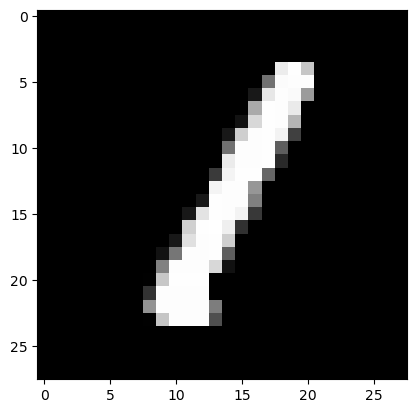

In [16]:
i = 3
image = x_train[i]

plt.imshow(image.reshape([28, 28]), cmap='Greys_r')
print(f'This image is a {y_train[i]}')

filename = f'im{i}_{y_train[i]}.vhd'

pixel_values = image

file = open(filename, 'w')

fileWidth = 28
xCoordinate = -1
yCoordinate = 0

file.write('library IEEE;\nuse IEEE.std_logic_1164.all;\nuse IEEE.numeric_std.all;')
file.write(f'entity im{i}_{y_train[i]} is')
file.write('    port(\n')
file.write('        clk : in std_logic;\n')
file.write('        totaladr: in unsigned(9 downto 0);\n')
file.write('        grayScale : out std_logic_vector(7 downto 0)\n')
file.write('        );\n')
file.write(f'end im{i}_{y_train[i]};\n')
file.write('\n')
file.write(f'architecture synth of im{i}_{y_train[i]} is\n')
file.write('begin\n')
file.write('    process (clk) begin\n')
file.write('        if rising_edge(clk) then\n')
file.write('            case totaladr is\n')

print(len(pixel_values))

for i in range(len(pixel_values)):
    xCoordinate += 1
    if xCoordinate == fileWidth:
        yCoordinate += 1
        xCoordinate = 0

    addr = str(f'{yCoordinate:05b}') + str(f'{xCoordinate:05b}')

    grayScale = int(pixel_values[i] * 128)

    color = str(f'{grayScale:08b}')
    file.write('                when "' + addr + '" => grayScale <= "' + color + '";\n')
file.write('                when others => grayScale <= "00000000";\n')

file.write('        end case;\n')
file.write('    end if;\n')
file.write('    end process;\n')
file.write('end;\n')

file.close()